In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48841, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48841 non-null  int64 
 1   workclass        48841 non-null  object
 2   fnlwgt           48841 non-null  int64 
 3   education        48841 non-null  object
 4   educational-num  48841 non-null  int64 
 5   marital-status   48841 non-null  object
 6   occupation       48841 non-null  object
 7   relationship     48841 non-null  object
 8   race             48841 non-null  object
 9   gender           48841 non-null  object
 10  capital-gain     48841 non-null  int64 
 11  capital-loss     48841 non-null  int64 
 12  hours-per-week   48841 non-null  int64 
 13  native-country   48841 non-null  object
 14  income           48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print(f"There are {len(categorical)} categorical variables ")
print('Categorical variable are :\n \n', categorical)

There are 9 categorical variables 
Categorical variable are :
 
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [6]:
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


In [7]:
df[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [8]:
for var in categorical:
    print(df[var].value_counts())

Private             33905
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15784
Some-college    10877
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Married-civ-spouse       22379
Never-married            16116
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         561

In [9]:
for var in categorical :
    print(df[var].value_counts()/np.float(len(df)))

Private             0.694191
Self-emp-not-inc    0.079073
Local-gov           0.064208
?                   0.057308
State-gov           0.040560
Self-emp-inc        0.034704
Federal-gov         0.029320
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64
HS-grad         0.323171
Some-college    0.222702
Bachelors       0.164309
Masters         0.054401
Assoc-voc       0.042198
11th            0.037100
Assoc-acdm      0.032780
10th            0.028439
7th-8th         0.019553
Prof-school     0.017076
9th             0.015479
12th            0.013452
Doctorate       0.012162
5th-6th         0.010422
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64
Married-civ-spouse       0.458201
Never-married            0.329969
Divorced                 0.135808
Separated                0.031326
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64


In [10]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
df['workclass'].value_counts()

Private             33905
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
df['workclass'].replace('?', np.NaN, inplace=True)

In [13]:
df['workclass'].value_counts()

Private             33905
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [15]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3021
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [16]:
df['occupation'].replace('?', np.NaN, inplace = True)

In [17]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3021
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [18]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France'],
      dtype=object)

In [19]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [20]:
df['native-country'].replace('?', np.NaN, inplace = True)

In [21]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [22]:
df[categorical].isnull().sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
native-country     857
income               0
dtype: int64

In [23]:
for var in categorical:
    print(var , 'contains', len(df[var].unique()), 'labels')

workclass contains 9 labels
education contains 16 labels
marital-status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
gender contains 2 labels
native-country contains 41 labels
income contains 2 labels


In [24]:
numarical = [var for var in df.columns if df[var].dtype !='O']
print(f"There are {len(numarical)} numarical variables ")
print("the numarical variables are :\n \n", numarical)

There are 6 numarical variables 
the numarical variables are :
 
 ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [25]:
df[numarical].head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [26]:
df[numarical].isnull().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

In [27]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [28]:
X = df.drop('income', axis = 1)
y = df['income']

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
X_train.shape, X_test.shape

((39072, 14), (9769, 14))

In [31]:
X_train.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

In [32]:
categorical = [var for var in X_train.columns if df[var].dtype == 'O']
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [33]:
numarical = [var for var in X_train.columns if df[var].dtype != 'O']
numarical

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [34]:
X_train[categorical].isnull().mean()

workclass         0.056844
education         0.000000
marital-status    0.000000
occupation        0.057049
relationship      0.000000
race              0.000000
gender            0.000000
native-country    0.017225
dtype: float64

In [35]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(f"Col {col} : {(X_train[col].isnull().mean()):0.4f}")

Col workclass : 0.0568
Col occupation : 0.0570
Col native-country : 0.0172


In [36]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native-country'].fillna(X_train['native-country'].mode()[0], inplace=True)    

/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/pandas/core/series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [37]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [38]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [39]:
X_train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [40]:
X_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [41]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [42]:
X_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
12300,Local-gov,HS-grad,Separated,Adm-clerical,Unmarried,White,Female,Puerto-Rico
24609,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
2516,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
6663,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male,Puerto-Rico
45320,Private,Some-college,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States


In [43]:
X_test[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
37360,Private,Assoc-acdm,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
46632,Private,Assoc-voc,Married-civ-spouse,Tech-support,Husband,White,Male,United-States
21033,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
3646,Private,HS-grad,Widowed,Other-service,Unmarried,White,Female,United-States
42100,State-gov,HS-grad,Divorced,Adm-clerical,Other-relative,White,Female,United-States


In [44]:
# import category_encoders as ce 
# encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race' , 'gender' , 'native-country'])
# X_train = encoder.fit_transform(X_train)
# X_test = encoder.fit_transform(X_test)
# print(X_train)
# print(X_test)


In [45]:
import category_encoders as ce 
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race' , 'gender', 'native-country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [46]:
# X_test = encoder.fit_transform(X_test)

In [47]:
# X_train.drop('native-country_41',axis= 1, inplace=True)
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
12300,51,1,0,0,0,0,0,0,0,164300,...,0,0,0,0,0,0,0,0,0,0
24609,46,0,1,0,0,0,0,0,0,73019,...,0,0,0,0,0,0,0,0,0,0
2516,24,0,1,0,0,0,0,0,0,354351,...,0,0,0,0,0,0,0,0,0,0
6663,34,0,1,0,0,0,0,0,0,163581,...,0,0,0,0,0,0,0,0,0,0
45320,34,0,1,0,0,0,0,0,0,222548,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# X_test['native-country_41'] = X_test['native-country_41'].fillna(0)
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
37360,48,1,0,0,0,0,0,0,0,99127,...,0,0,0,0,0,0,0,0,0,0
46632,62,1,0,0,0,0,0,0,0,211408,...,0,0,0,0,0,0,0,0,0,0
21033,60,1,0,0,0,0,0,0,0,199947,...,0,0,0,0,0,0,0,0,0,0
3646,72,1,0,0,0,0,0,0,0,181494,...,0,0,0,0,0,0,0,0,0,0
42100,45,0,1,0,0,0,0,0,0,130206,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train.shape

(39072, 104)

In [50]:
X_test.shape

(9769, 104)

In [51]:
cols = X_train.columns

In [52]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [54]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [55]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
0,0.70,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.112078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.871302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.468661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.118058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [58]:
from sklearn.metrics import accuracy_score
print(f"Model Accuracy score : {accuracy_score(y_pred, y_test):0.4f}")

Model Accuracy score : 0.8054


In [59]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [60]:
print(f"Training-set accuracy score : {accuracy_score(y_train, y_pred_train):0.4f}")

Training-set accuracy score : 0.8005


In [61]:
print(f"Training set Score : {gnb.score(X_train, y_train):0.4f}")
print(f"Test set score : {gnb.score(X_test, y_test):0.4f}")

Training set Score : 0.8005
Test set score : 0.8054


In [62]:
y_test.value_counts()

<=50K    7473
>50K     2296
Name: income, dtype: int64

In [63]:
null_accuracy = (7473/(7473+2296))
print(f"Null Accuracy Score : {null_accuracy:0.4f}")

Null Accuracy Score : 0.7650


In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Metric \n \n  ",cm)
print("\n True Positive ", cm[0,0])
print("\n True Negative ", cm[1,1])
print("\n Flase Positive ", cm[0,1])
print("\n False Negative ", cm[1,0])

Confusion Metric 
 
   [[7201  272]
 [1629  667]]

 True Positive  7201

 True Negative  667

 Flase Positive  272

 False Negative  1629


<AxesSubplot:>

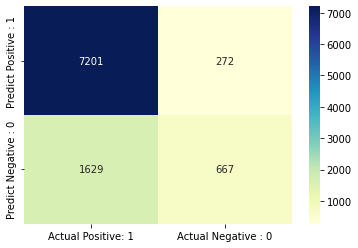

In [68]:
cm_metrix = pd.DataFrame(data= cm , columns=['Actual Positive: 1', 'Actual Negative : 0'],
                         index= ['Predict Positive : 1', 'Predict Negative : 0'])
import seaborn as sns 
sns.heatmap(cm_metrix, annot=True, fmt='d', cmap='YlGnBu')

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.96      0.88      7473
        >50K       0.71      0.29      0.41      2296

    accuracy                           0.81      9769
   macro avg       0.76      0.63      0.65      9769
weighted avg       0.79      0.81      0.77      9769



In [70]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [71]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(f"Classification Accuracy :{classification_accuracy:0.4f}")

Classification Accuracy :0.8054


In [73]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(f"Classification Error :{classification_error:0.4f}")

Classification Error :0.1946
